In [ ]:
"""
Seaborn을 사용한 데이터 분포 시각화

Seaborn은 matplotlib을 기반으로 
다양한 색상 테마와 통계용 챠트 등의 기능을 추가한 시각화 패키지이다. 
당연히 matplotlib 패키지에 의존하며 통계 기능의 경우에는 
statsmodels 패키지에 의존한다. 

Seaborn에 대한 자세한 내용은 다음 웹사이트를 참조한다.

http://stanford.edu/~mwaskom/software/seaborn/index.html
"""

In [ ]:
"""
스타일

seaborn을 import하게 되면 바탕화면, axis, 색상 팔레트 등을 
matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 
지정한 디폴트 스타일 집합으로 변경한다. 
따라서 동일한 matplotlib 명령을 수행해도 Seaborn을 
임포트 한 것과 하지 않은 플롯은 모양이 다르다.

set 명령으로 스타일을, set_color_codes 명령으로는 기본 색상을 변경한다.
"""

In [40]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_color_codes()

In [ ]:
# 1차원 분포 플롯
# 1차원 데이터은 실수 값이면 
# 히스토그램 등의 실수 분포 플롯, 카테고리 값이면 카운트 플롯으로 나타낸다.

In [4]:
# sample data load
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

In [ ]:
"""
실수 분포 플롯

실수 분포 플롯은 자료의 분포를 묘사하기 위한 것으로 
matplotlib의 단순한 히스토그램과 달리 
커널 밀도(kernel density) 및 
러그(rug) 표시 기능 및 
다차원 복합 분포 기능 등을 제공한다. 

실수 분포 플롯 명령에는 다음과 같은 것들이 있다.

rugplot
kdeplot
distplot
jointplot
pairplot
"""

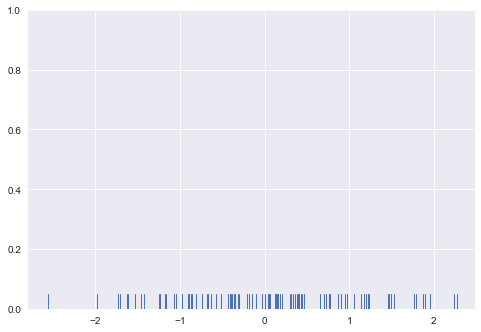

In [6]:
# rugplot : 데이터 위치를 x축 위에 작은 선분으로 나타내어 
# 실제 데이터 분포를 보여준다.
np.random.seed(0)
x = np.random.randn(100)
sns.rugplot(x)
plt.show()

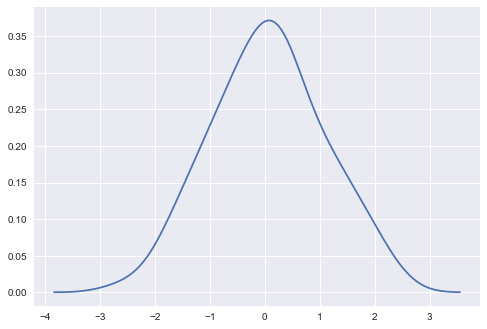

In [8]:
# kdeplot() : 커널 밀도(kernel density)는 커널이라고 하는 단위 플롯을 
# 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여준다. 
# 커널 밀도 추정에 대한 자세한 내용은 scikit-learn 패키지를 참조한다.
# http://scikit-learn.org/stable/modules/density.html

sns.kdeplot(x)
plt.show()

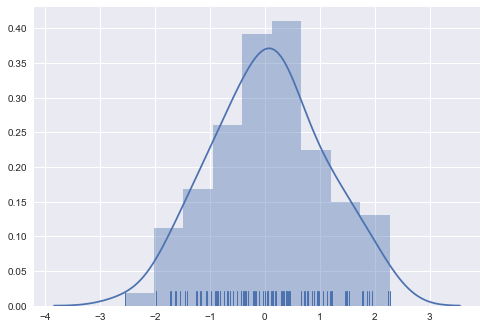

In [14]:
# distplot() : matplotlib의 히스토그램 명령을 대체하여 많이 쓰인다. 
# 러그와 커널 밀도 표시 기능도 가지고 있다
sns.distplot(x, kde=True, rug=True)
plt.show()

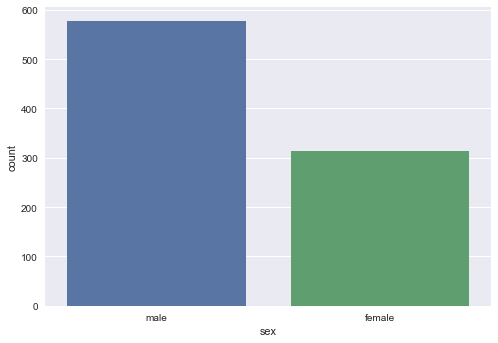

In [15]:
# countplot() : 명령으로 각 카테고리별 데이터 값을 셀 수 있다.
sns.countplot(x="sex", data=titanic)
plt.show()

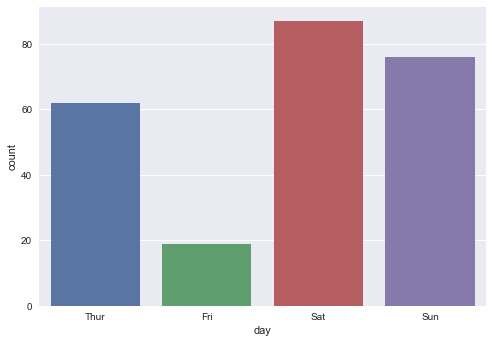

In [16]:
sns.countplot(x="day", data=tips)
plt.show()

In [ ]:
"""
다차원 데이터

데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 
다음과 같은 경우가 있을 수 있다.

분석하고자 하는 데이터가 모두 실수 값인 경우
분석하고자 하는 데이터가 모두 카테고리 값인 경우
분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우
"""

In [ ]:
"""
2차원 실수형 데이터

만약 데이터가 2차원이고 모두 연속적인 실수값이라면 
scatter plot을 사용하면 된다. 
scatter plot을 그리기 위해서는 
seaborn 패키지의 jointplot 명령을 사용한다. 
jointplot 명령은 scatter plot뿐 아니라 각 변수의 히스토그램도 동시에 그린다.
"""

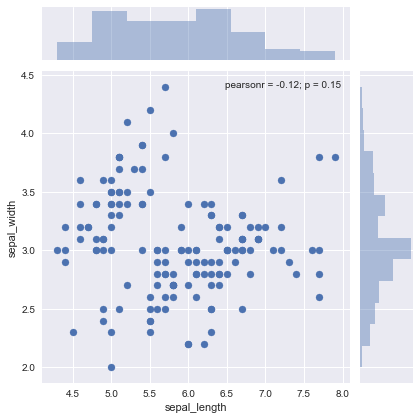

In [17]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.show()

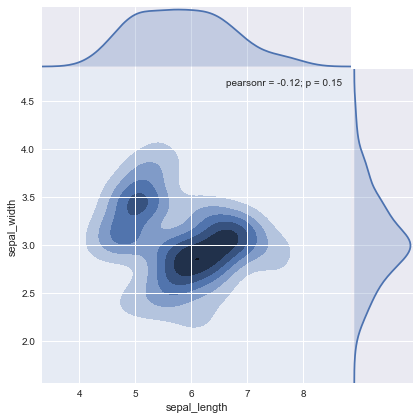

In [19]:
# 또한 인수를 바꾸면 커널 밀도의 형태로도 표시할 수 있다.
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, 
              kind="kde", space=0, zorder=0, n_levels=6)
plt.show()

In [ ]:
"""
다차원 실수형 데이터

만약 3차원 이상의 데이터라면 seaborn 패키지의 pairplot 명령을 사용한다. 
pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 
히스토그램과 스캐터 플롯을 그린다.
"""

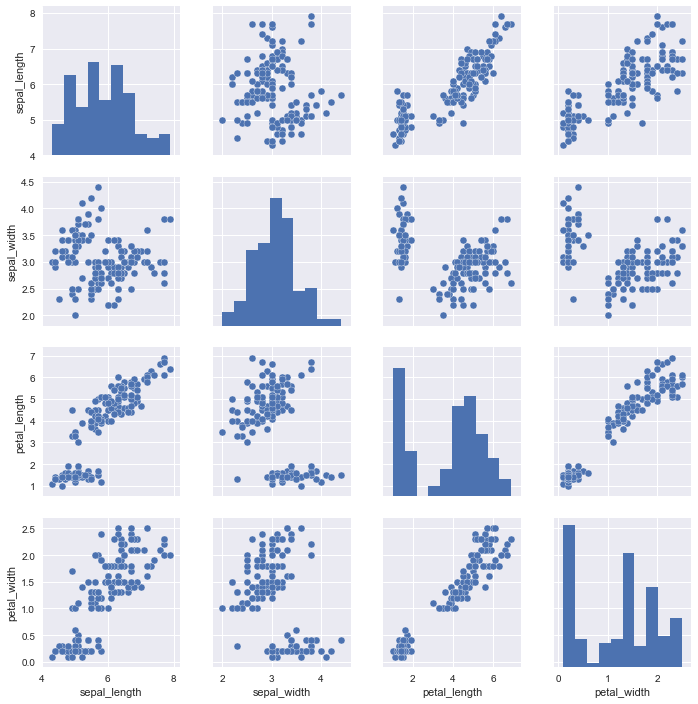

In [22]:
sns.pairplot(iris)
plt.show()

In [62]:
# 만약 카테고리형 데이터가 섞여 있다면 
# hue 인수를 이용하여 카테고리 별로 색상을 다르게 할 수 있다.
sns.pairplot(iris, hue="species")
plt.show()

In [33]:
# 2차원 카테고리 데이터
# 만약 데이터가 2차원이고 모든 값이 카테고리 값이면 heatmap 명령을 사용한다.
titanic_size = titanic.pivot_table(index="class", columns="embark_town", aggfunc="size")
titanic_size

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


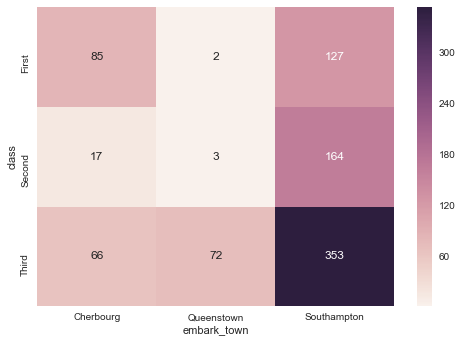

In [36]:
sns.heatmap(titanic_size, annot=True, fmt="d")
plt.show()

In [ ]:
"""
2차원 복합 데이터

만약 데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 
기존의 플롯 이외에도 다음과 같은 분포 플롯들을 이용할 수 있다.

barplot
boxplot
pointplot
violinplot
stripplot
swarmplot

barplot 은 카테고리 값에 따른 실수 값의 평균과 표준 편차를 표시하는 
기본적인 바 차트를 생성한다.
"""

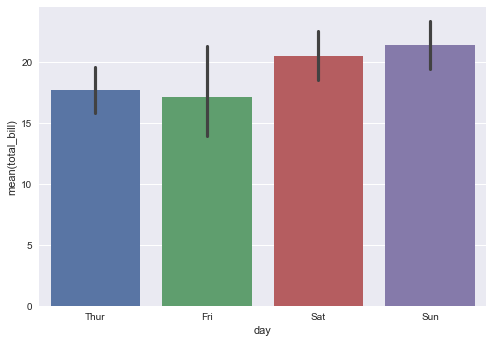

In [38]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.show()

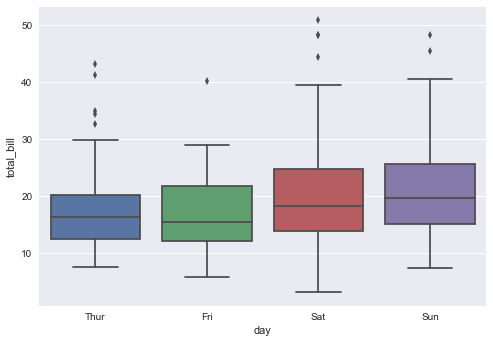

In [42]:
# boxplot() : 박스는 실수 값 분포에서 1사분위수와 3사분위수를 뜻하고 
# 박스 내부의 가로선은 중앙값, 박스 외부의 세로선(Whisker)은 
# 3사분위 수와 1사분위 수 사이의 거리의 1.5배 길이를 의미한다. 
# 세로선 바깥의 점은 아웃라이어(outlier)이다.
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

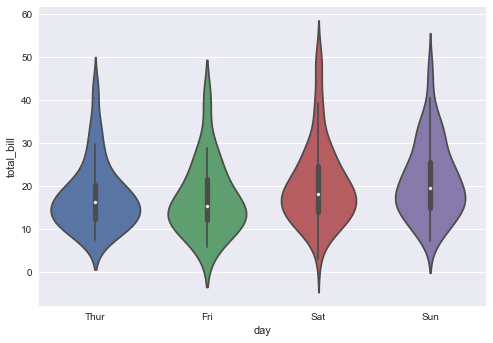

In [44]:
# boxplot이 중앙값, 표준 편차 등, 분포의 간략한 특성만 보여주는데 반해 
# violinplot, stripplot. swarmplot 등은 
# 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점이 있다.
sns.violinplot(x="day", y="total_bill", data=tips)
plt.show()

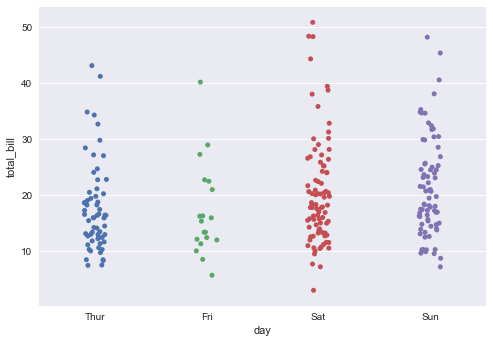

In [45]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.show()

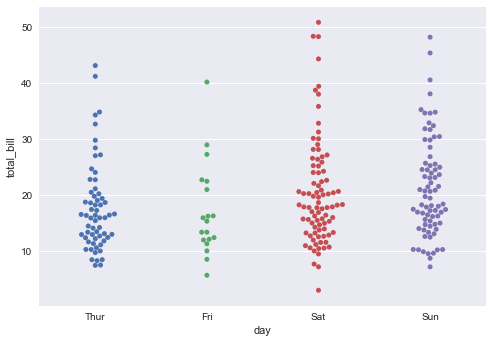

In [46]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.show()

In [ ]:
"""
다차원 복합 데이터
지금까지 소개한 대부분의 명령어에는 2차원 이상의 고차원 데이터에 대해서도 
분석할 수 있는 기능이 포함되어 있다.

예를 들어 barplot, violinplot, boxplot 등 에서는 
두 가지 카테고리 값에 의한 실수 값의 변화를 보기 위한 hue 인수를 제공한다.
"""

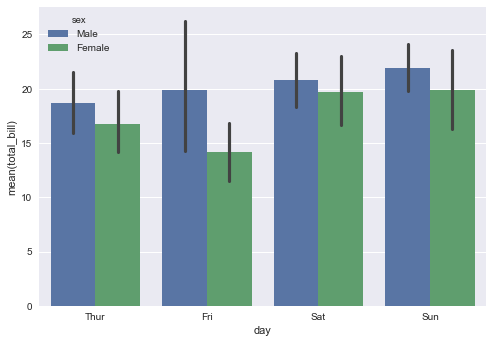

In [47]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

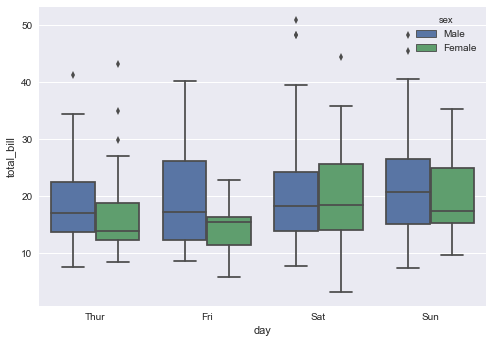

In [48]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

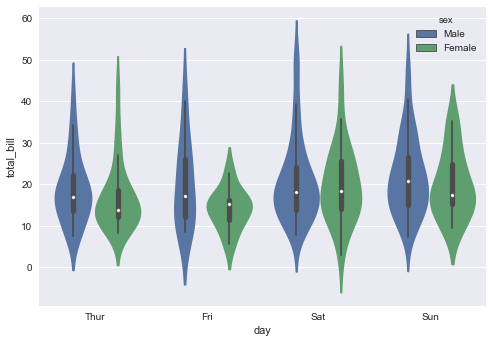

In [49]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

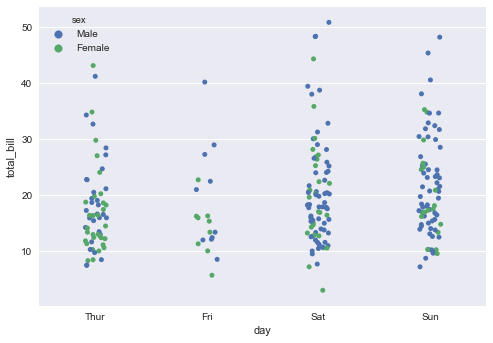

In [52]:
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.show()

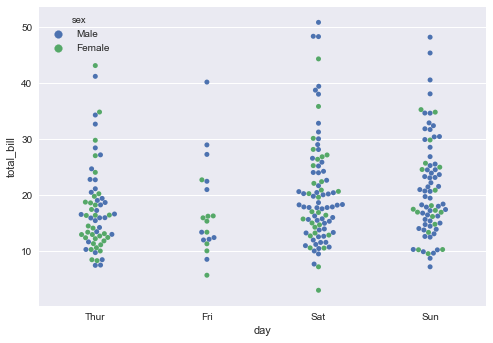

In [54]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

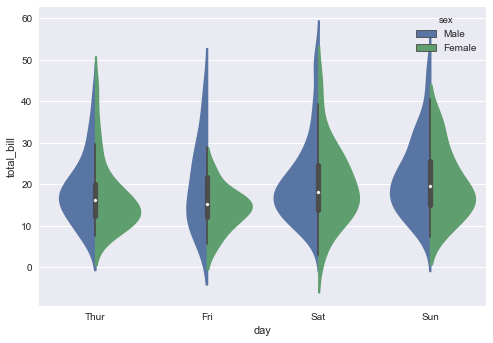

In [55]:
# stripplot, violinplot, swarmplot 등 에서는 
# split 옵션으로 시각화 방법을 변경할 수도 있다
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, 
               split=True)
plt.show()

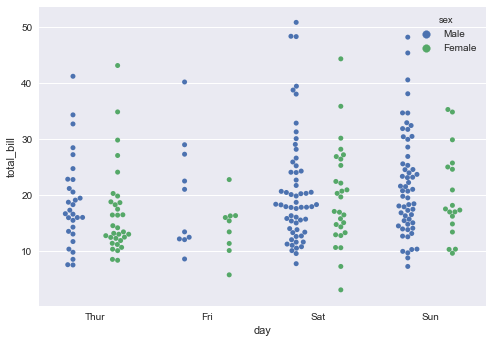

In [56]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, 
              split=True)
plt.show()

In [59]:
# heatmap을 이용해도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.
flights_passengers = flights.pivot("month", "year", "passengers")
flights_passengers

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [63]:
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

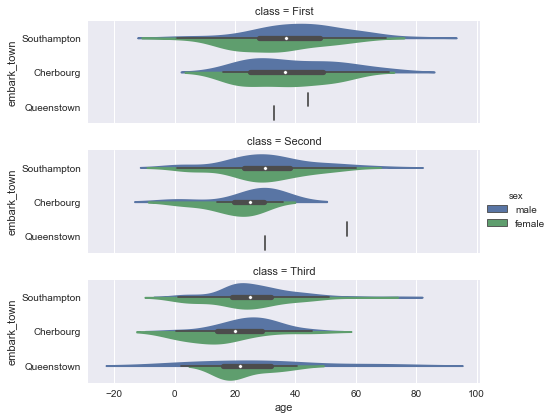

In [66]:
# factorplot() : 색상(hue)과 행(row) 등을 동시에 사용하여 
# 3 개 이상의 카테고리 값에 의한 분포 변화를 보여준다.
sns.factorplot(x="age", y="embark_town", hue="sex", row="class", 
               data=titanic,
               size=2, aspect=3.5, kind="violin", split=True)
plt.show()

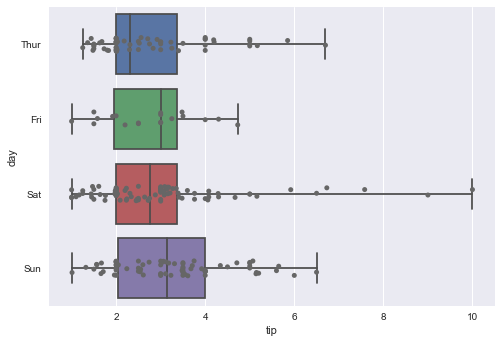

In [67]:
# 시각화 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표시할 수도 있다.
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

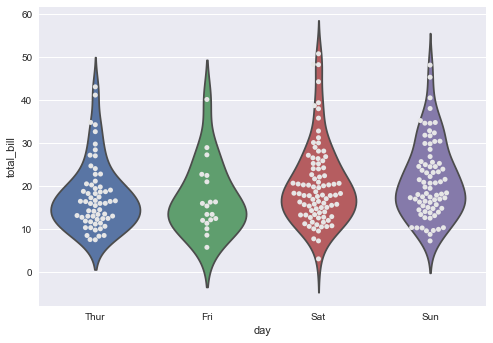

In [69]:

sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()